# User Logs (mini-project)

**Importing dataset with user data from a csv-file in the working directory**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
user_data = pd.read_csv('3_user_data.csv')
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


**Importing dataset with logs from a csv-file in the working directory**

In [6]:
logs = pd.read_csv('3_logs.csv')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


**Checking generate descriptive statistics**

In [8]:
logs.platform.describe()

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

**Printing a concise summary of a DataFrame**

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
client     2954 non-null int64
premium    2954 non-null bool
age        2954 non-null int64
dtypes: bool(1), int64(2)
memory usage: 49.1 KB


**Checking columns datatypes**

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

**Checking NaN (Not a Number) values in the dataset**

In [12]:
# True -- NaN value, False -- not a NaN value
user_data.isna().head()

,client,premium,age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


**Counting NaN values in the dataset**

In [13]:
user_data.isna().sum()
# we do not have Nan values in our user_data dataset

client     0
premium    0
age        0
dtype: int64

**Discovering unique values of the platform column**

In [15]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

**Finding the most active clients (based on success operations number parameter)**

In [16]:
logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count'}) \
    .sort_values('count', ascending = False) \
    .query('count > 40').reset_index() \
    .sort_values('client', ascending = True).client \

0    12179
8    28719
7    36165
2    52870
1    61468
3    61473
6    78349
5    82563
4    92584
Name: client, dtype: int64

**Finding platform with the most number of successful operations**

In [182]:
logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count'}) \
    .sort_values('count', ascending = False) \

,platform,count
1,phone,2019
0,computer,1090
2,tablet,180


**Finding the most popular platform among premium clients**

In [183]:
user_data.merge(logs, on = 'client').query('premium == True') \
    .groupby('platform') \
    .agg({'time' : 'count'}) \
    .sort_values('time', ascending = False)

,time
platform,
phone,246
computer,150
tablet,24


**Visualizing the clients age distribution vs clients type (premium or not)**

In [26]:
merged_data_true = user_data.merge(logs, on = 'client').query('premium == True')
merged_data_true.head()

merged_data_false = user_data.merge(logs, on = 'client').query('premium == False')
merged_data_false.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


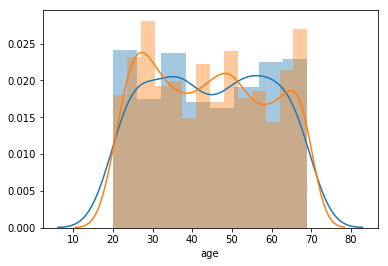

In [27]:
#ax = plt.subplots()
ax = sns.distplot(merged_data_true.age)
ax = sns.distplot(merged_data_false.age)

**Visualizing the number of successful operations vs number of clients**

In [28]:
n_succ_oper = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count'}) \
    .sort_values('count', ascending = False) \
    .groupby('count', as_index = False) \
    .agg({'client' : 'count'})

n_succ_oper.head()

,count,client
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


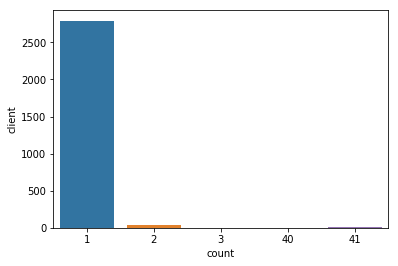

In [29]:
 sns.barplot(x="count", y="client", data=n_succ_oper)

**Visualizing the number of successful operations using computers vs age**

In [34]:
comp_oper = user_data.merge(logs, on = 'client').query("success == True & platform == 'computer'")

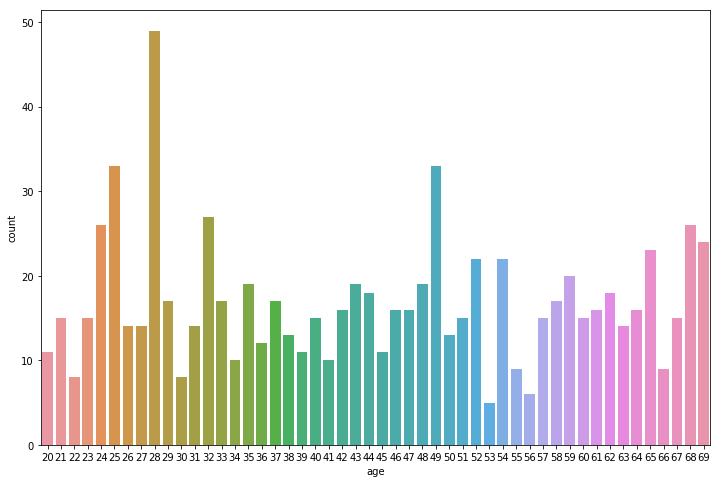

In [35]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="age", data=comp_oper)